In [1]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [2]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1            
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext        
        
        print('{} - {} / {}'.format(counter, round(data[y_symbol][0], 2), round(data[x_symbol][0], 2)))
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2021-01-15
data: (424, 79)
pairs: (2534, 12)


In [5]:
#data.to_excel('datasets/data_cart.xlsx')

In [6]:
#pairs

In [31]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 10) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,BBDC4,EMBR3,-4.458060,99,1.520686,2.074182,2,Long/Short,0.573567,9,"100,120,140,160,180,200,220,240,250"
1,100,HYPE3,PETR4,-4.740813,99,0.526478,2.164898,2,Short/Long,0.315678,9,"100,120,140,160,180,200,220,240,250"
2,100,HAPV3,VIVT3,-5.622931,99,0.216909,2.058694,2,Short/Long,0.164460,9,"100,120,140,160,180,200,220,240,250"
3,100,PRIO3,VALE3,-4.711961,99,1.518143,2.461965,2,Short/Long,0.413757,9,"100,120,140,160,180,200,220,240,250"
4,100,BBDC3,EMBR3,-3.992669,99,1.335642,2.329307,3,Long/Short,0.594070,9,"100,120,140,160,180,200,220,240,250"
5,100,HAPV3,YDUQ3,-4.997029,99,0.093300,2.230268,3,Short/Long,0.234332,9,"100,120,140,160,180,200,220,240,250"
6,100,HAPV3,VALE3,-5.138066,99,0.057273,2.210589,3,Short/Long,0.076069,9,"100,120,140,160,180,200,220,240,250"
7,100,HAPV3,USIM5,-4.966255,99,0.358205,2.392571,3,Short/Long,0.119265,9,"100,120,140,160,180,200,220,240,250"
8,100,HAPV3,UGPA3,-5.050019,99,0.176679,2.415406,3,Short/Long,0.221340,9,"100,120,140,160,180,200,220,240,250"
9,100,HAPV3,TAEE11,-5.130844,99,0.232567,2.488891,3,Short/Long,0.299834,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [22]:
#plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [23]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [24]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [25]:
#new pairs 0,1,8
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,CSNA3,USIM5,-4.218576,99,0.912734,2.006251,2,Short/Long,0.664468,9,"100,120,140,160,180,200,220,240,250"


In [12]:
"""new = pairs_signal.iloc[[0,5,8]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
#oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[0,5,8]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\n#oper.to_csv('datasets/operations.csv', index=False)\noper"

In [13]:
#oper.to_csv('datasets/operations.csv', index=False)

In [14]:
check_coint(oper, data)

CSNA3/USIM5, 100, False, 0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0 - 34.36 / 15.02


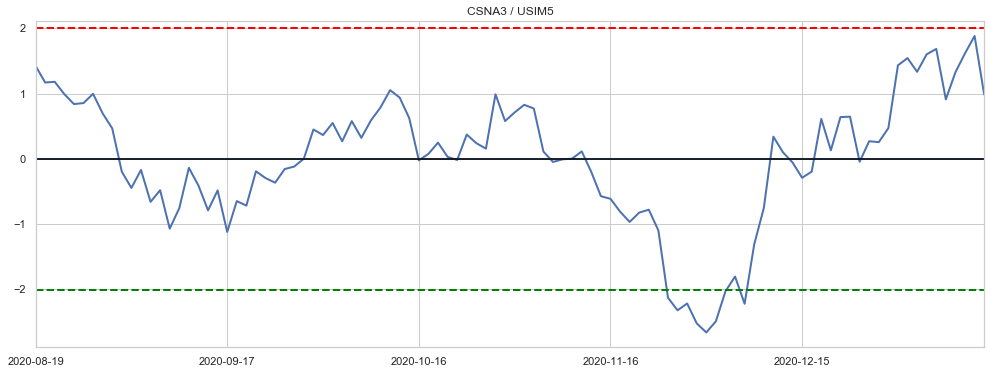

In [15]:
plot_pairs(oper, data)

In [16]:
#df.to_excel('datasets/data_cart.xlsx')

In [17]:
parameters_input_cash_neutral(oper, data)

Short: CSNA3 (34.36) 100 <-> Long: USIM5 (15.02) 100


In [18]:
"""
Short: CSNA3 (16.54) 100 <-> Long: USIM5 (10.07) 100
Short: IRBR3 (8.1) 300 <-> Long: SANB11 (27.9) 100
Short: RADL3 (24.09) 100 <-> Long: VVAR3 (17.87) 100
"""

'\nShort: CSNA3 (16.54) 100 <-> Long: USIM5 (10.07) 100\nShort: IRBR3 (8.1) 300 <-> Long: SANB11 (27.9) 100\nShort: RADL3 (24.09) 100 <-> Long: VVAR3 (17.87) 100\n'

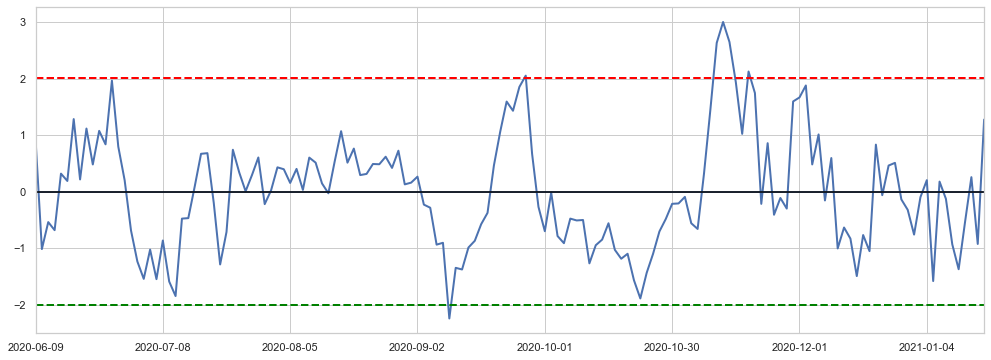

In [19]:
mult.plot_residue(mult.residue(data['PETR3'], data['PETR4'], 150) )

In [20]:
mult.analysis_by_periods(data['PETR3'], data['PETR4'])

,Period,Stationary,Std,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Model
0,100,False,1.168849,-2.781051,90,1.059659,3,0.982778,MRLM
1,120,True,1.316087,-3.177232,95,1.062805,3,0.983390,MRLM
2,140,True,1.233929,-3.530902,99,1.058684,3,0.981750,MRLM
3,160,True,1.235136,-3.794603,99,1.057994,2,0.978257,MRLM
4,180,True,1.302433,-5.726225,99,1.057360,2,0.972506,MRLM
5,200,True,0.251350,-3.407721,95,1.080113,4,0.966522,MRLM
6,220,True,0.144383,-3.773724,99,1.069045,4,0.986378,MRLM
7,240,True,0.145148,-4.117407,99,1.064868,4,0.986178,MRLM
8,250,True,0.138637,-4.025445,99,1.057677,4,0.985653,MRLM
